# Insatalling the important libraries.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

Load the data.

In [2]:
tp=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
tp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
tp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
tp.shape

(891, 12)

In [6]:
tp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
tp.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Describing Data

In [8]:
tp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking the empty cells present in the dataset.

In [9]:
tp.isnull().sum()#.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Information 

In [10]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Lets drop the columns which are not contributing in prediction.

In [13]:
tp = tp.drop(columns='Cabin', axis=1)

Replacing missing values with mean value.

In [14]:
tp['Age'].fillna(tp['Age'].mean(), inplace=True)

Lets check the mode value of embarked column.

In [15]:
print(tp['Embarked'].mode())

0    S
dtype: object


Replacing the missing value with mode value.

In [16]:
tp['Embarked'].fillna(tp['Embarked'].mode()[0], inplace=True)

Now,Lets check again if there is any null values present or not.

In [17]:
tp.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

************There is no null value present in the table now*********

Replacing the categoical Variable to numerical.

In [18]:
tp.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [19]:
tp['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [23]:
tp['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

Passengers embraked based on sex

In [27]:
tp["Sex"].value_counts()#0 denotes men whereas 1 denotes females

0    577
1    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Embarked'>

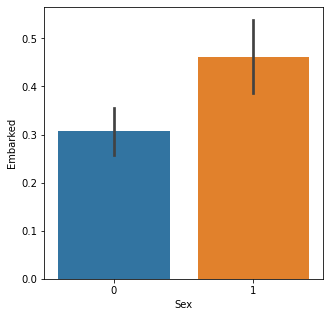

In [32]:
plt.figure(figsize=(5,5))
sns.barplot(x='Sex', y='Embarked',data=tp)

Passengers age with respect to their sex.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

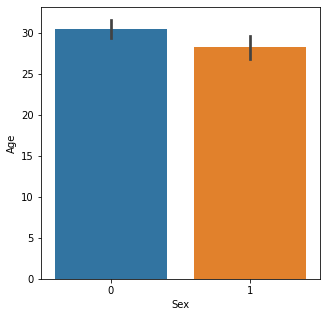

In [33]:
plt.figure(figsize=(5,5))
sns.barplot(x='Sex', y='Age',data=tp)

Survived vs Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

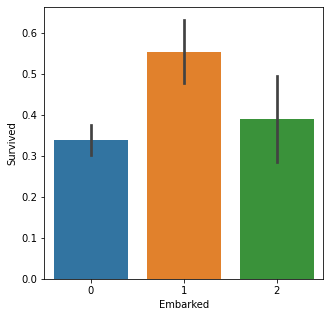

In [38]:
plt.figure(figsize=(5,5))
sns.barplot(x='Embarked', y='Survived',data=tp)

In [39]:
tp.head()
#Dataset has changed into useful values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Dropping the irrelevent columns which has nothing to do with the prediction.

In [40]:
tp=tp.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [41]:
tp.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Correalation Matrix

In [42]:
tp.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

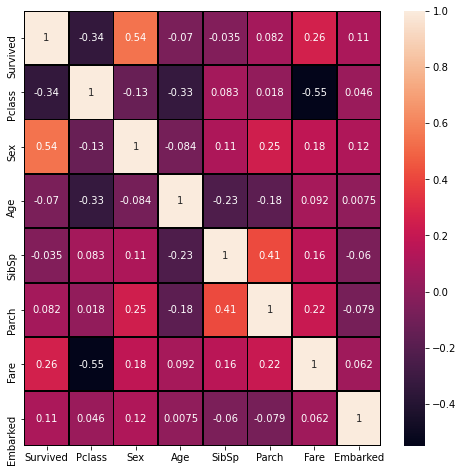

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(tp.corr(),annot=True,linecolor="Black",linewidth=0.8)

# Model Implementation

In [44]:
X=tp.drop('Survived', axis=1)
y=tp['Survived']

In [45]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [46]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Data modelling

In [47]:
#now will train data at 80% and test at 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=0)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:       Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
140       3    1  29.699118      0      2  15.2458         1
439       2    0  31.000000      0      0  10.5000         0
817       2    0  31.000000      1      1  37.0042         1
378       3    0  20.000000      0      0   4.0125         1
491       3    0  21.000000      0      0   7.2500         0
..      ...  ...        ...    ...    ...      ...       ...
835       1    1  39.000000      1      1  83.1583         1
192       3    1  19.000000      1      0   7.8542         0
629       3    0  29.699118      0      0   7.7333         2
559       3    1  36.000000      1      0  17.4000         0
684       2    0  60.000000      1      1  39.0000         0

[712 rows x 7 columns]
y_train:  140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64
X_test:       Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
495       3 

In [48]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

acc_log

80.34

In [49]:
cm=confusion_matrix(y_test,prediction)
print(cm)

fg=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation="quadric")
plt.title("Support Vector Classifier-Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Expected')     
plt.show()

NameError: name 'confusion_matrix' is not defined

In [50]:
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictiom = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

83.29

In [51]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.17

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.17

In [53]:
#creating dataframe for clarity
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest,acc_decision_tree]})
models.sort_values(by='Score', ascending=True)

,Model,Score
1,Logistic Regression,80.34
0,KNN,83.29
2,Random Forest,98.17
3,Decision Tree,98.17


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[100,  10],
       [ 20,  49]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8324022346368715

In [56]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, prediction)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, prediction)


ROC and AUC Score based on DecisionTree and Logistic Regression

In [57]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, prediction))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, prediction))

roc_auc_score for DecisionTree:  0.8096179183135704
roc_auc_score for Logistic Regression:  0.8096179183135704


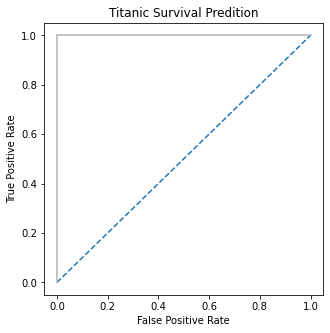

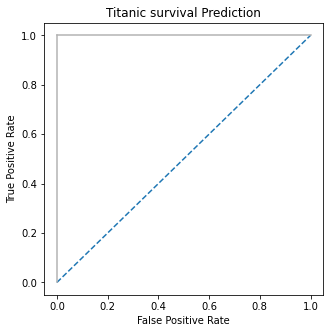

In [58]:
plt.subplots(1, figsize=(5,5))
plt.title('Titanic Survival Predition')
#plt.plot('false_positive_rate1', 'true_positive_rate1')
plt.plot([0, 1],ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(5,5))
plt.title('Titanic survival Prediction')
#plt.plot('false_positive_rate2', 'true_positive_rate2')
plt.plot([0, 1],ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Final accuracy is 80% in both roc and auc which fine.

Saving the model

In [59]:
import pickle
import joblib 

In [60]:
joblib.dump(roc_auc_score,'Titanic Survival Prediction.pkl')

['Titanic Survival Prediction.pkl']